In [10]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
from cdlib import algorithms


Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'wurlitzer', 'leidenalg', 'graph_tool', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'leidenalg', 'infomap'}


In [12]:
# Load the country relationships dataset
file_path = "/Users/runi/Desktop/cf_pyth/pythontasks/country_relationships.csv"

# Read the file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Country1,Country2
0,Germany,Italy
1,Panama,Panama
2,Sweden,Norway
3,Japan,China
4,United States,Cuba


In [13]:
# Create a NetworkX graph from the DataFrame
G = nx.from_pandas_edgelist(df, source="Country1", target="Country2")


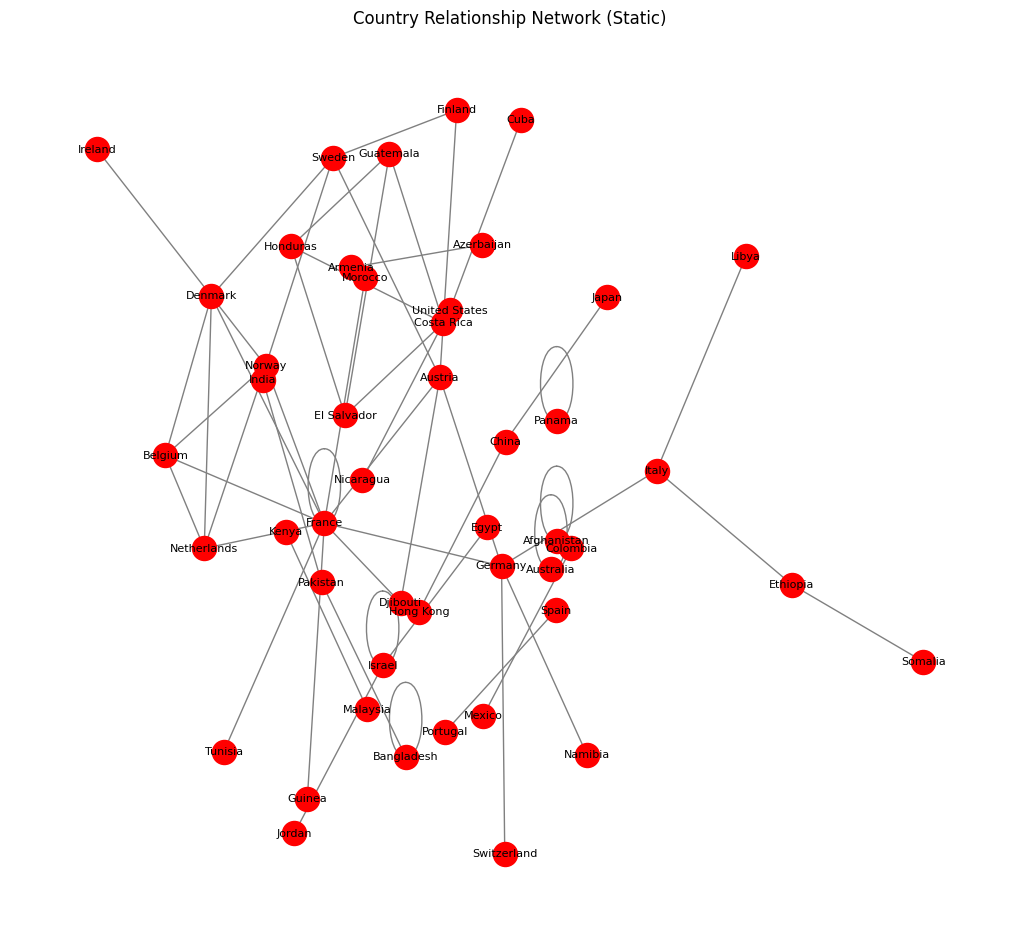

In [17]:
h = plt.figure(figsize=(10, 9))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_size=300, node_color = 'red', font_size=8, edge_cmap = plt.cm.Blues, pos = pos, edge_color="gray")
plt.title("Country Relationship Network (Static)")
plt.show()


In [18]:
h.savefig('networkx_plt_countries.png')

In [19]:
# Create a PyVis Network object
net = Network(notebook=True, width="1000px", height="800px", bgcolor="#222222", font_color="white")

# Add nodes and edges to the PyVis network
net.from_nx(G)

# Save and display the interactive network
net.show("country_relationships.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [22]:
import leidenalg

# Apply the Leiden algorithm to detect communities
communities = algorithms.leiden(G)

# Print the detected communities
print(communities.communities)


[['Norway', 'Morocco', 'France', 'Denmark', 'Belgium', 'Netherlands', 'Tunisia', 'Guinea', 'Ireland'], ['Germany', 'Italy', 'Libya', 'Ethiopia', 'Switzerland', 'Somalia', 'Namibia'], ['Costa Rica', 'Guatemala', 'Honduras', 'El Salvador'], ['Sweden', 'Austria', 'Djibouti', 'Finland'], ['Japan', 'China', 'Hong Kong'], ['United States', 'Cuba', 'Nicaragua'], ['India', 'Pakistan', 'Bangladesh'], ['Israel', 'Jordan', 'Egypt'], ['Azerbaijan', 'Armenia'], ['Kenya', 'Malaysia'], ['Portugal', 'Spain'], ['Mexico', 'Colombia'], ['Panama'], ['Australia'], ['Afghanistan']]


In [23]:
# Assign each node a color based on its community
color_map = {}
colors = ["red", "blue", "green", "yellow", "purple", "orange", "pink", "cyan"]

for i, community in enumerate(communities.communities):
    for node in community:
        color_map[node] = colors[i % len(colors)]  # Cycle through colors

# Create a new PyVis network graph
net_communities = Network(notebook=True, width="1000px", height="800px", bgcolor="#222222", font_color="white")

for node in G.nodes():
    net_communities.add_node(node, color=color_map.get(node, "white"))

# Add edges
net_communities.from_nx(G)

# Save and show the community graph
net_communities.show("community_network.html")


Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


Western European & African Connection
Cluster: ['Norway', 'Morocco', 'France', 'Denmark', 'Belgium', 'Netherlands', 'Tunisia', 'Guinea', 'Ireland']
- This cluster contains a mix of European nations and former French and Belgian colonies (Tunisia, Guinea, Morocco).
- Historically, France and Belgium had colonial ties with Africa, which explains their strong connections.
- The inclusion of Norway and Denmark suggests a broader European economic or diplomatic network.

Germany & Italy with African Ties
Cluster: ['Germany', 'Italy', 'Libya', 'Ethiopia', 'Switzerland', 'Somalia', 'Namibia']
- Italy had colonies in Libya, Ethiopia, and Somalia, which aligns with this grouping.
- Germany had historical ties with Namibia (formerly German Southwest Africa).
- Switzerland’s presence might reflect its economic connections with Europe rather than colonial ties.

Central American Cluster
Cluster: ['Costa Rica', 'Guatemala', 'Honduras', 'El Salvador']
- This reflects the historical and economic integration of Central America.
- These nations were part of the United Provinces of Central America (1823-1838), and even after dissolution, they remained closely connected.

Nordic & Eastern Europe Cluster
Cluster: ['Sweden', 'Austria', 'Djibouti', 'Finland']
- Sweden, Austria, and Finland were neutral or aligned nations in World War II and the Cold War.
- Djibouti’s inclusion is unusual, possibly due to French historical presence.

East Asian Cluster
Cluster: ['Japan', 'China', 'Hong Kong']
- Strong historical and economic relationships exist.
- World War II tensions (Japan's occupation of China) and post-war economic ties make this grouping logical.

U.S. and Latin America Cluster
Cluster: ['United States', 'Cuba', 'Nicaragua']
- U.S. influence in Latin America is well-documented (e.g., Cuban Missile Crisis, interventions in Nicaragua).
- The U.S. historically engaged in military and economic policies affecting these nations.

India-Pakistan-Bangladesh Cluster
Cluster: ['India', 'Pakistan', 'Bangladesh']
- These countries were one nation (British India) before 1947.
- The Partition of India (1947) and Bangladesh’s separation from Pakistan (1971) explain this grouping.

Middle Eastern Cluster
Cluster: ['Israel', 'Jordan', 'Egypt']
- Reflects the Arab-Israeli conflict, including wars like the Six-Day War (1967) and Camp David Accords (1978).

Remaining Clusters
Some pairs like ['Portugal', 'Spain'] and ['Azerbaijan', 'Armenia'] reflect historical and geopolitical ties.
- "Panama", "Australia", "Afghanistan" appearing alone suggests they had fewer strong ties in this dataset.

In [25]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Convert to DataFrame
centrality_df = pd.DataFrame({
    "Country": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Closeness Centrality": list(closeness_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
})

# Sort by Degree Centrality
centrality_df = centrality_df.sort_values(by="Degree Centrality", ascending=False)

# Show top 10 most central countries
print(centrality_df.head(10))


        Country  Degree Centrality  Closeness Centrality  \
11       France           0.260870              0.245245   
21      Denmark           0.130435              0.186853   
0       Germany           0.108696              0.224224   
4        Norway           0.108696              0.182508   
20      Austria           0.108696              0.206522   
30       Israel           0.086957              0.043478   
22      Belgium           0.086957              0.174396   
23  Netherlands           0.086957              0.174396   
3        Sweden           0.086957              0.166975   
17  El Salvador           0.065217              0.065217   

    Betweenness Centrality  
11                0.095330  
21                0.020290  
0                 0.084058  
4                 0.002899  
20                0.024638  
30                0.000966  
22                0.000000  
23                0.000000  
3                 0.005636  
17                0.000000  


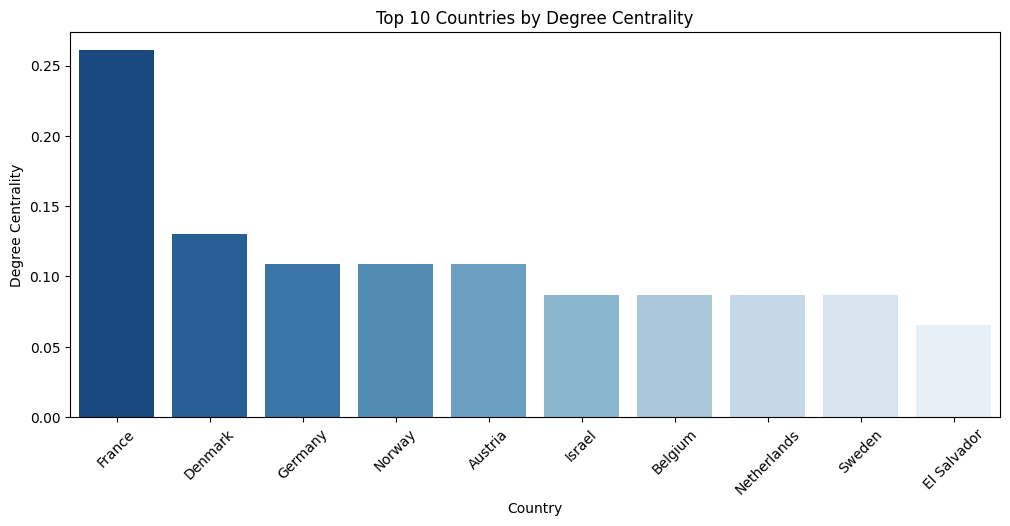

In [26]:
plt.figure(figsize=(12, 5))
sns.barplot(data=centrality_df.head(10), x="Country", y="Degree Centrality", palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Degree Centrality")
plt.show()


KEY INTERPRETATIONS:

<B>France has the highest centrality across all measures</B>

- Degree Centrality (0.26) → France has the most direct connections to other countries.
- Closeness Centrality (0.24) → France is relatively close to most other nations.
- Betweenness Centrality (0.095) → France acts as a bridge between different regions.

Historical Explanation: 
France was a major colonial power and played a central role in World War II, NATO, and EU integration.
_________________________________________________________________

<B>Germany’s high closeness and betweenness centrality</B>
- Germany was a key player in European politics (World Wars, Cold War, EU).
- Its betweenness (0.084) shows that it was a major transit point for international relations.
_________________________________________________________________

<B>Denmark, Norway, and Austria have relatively high influence</B>

- Likely due to their strategic positions in Europe and trade networks.
Denmark was involved in NATO, and Norway had strong ties with both Europe and the U.S..
_________________________________________________________________

<B>Israel’s low centrality despite geopolitical importance</B>

- Low closeness (0.043) and low betweenness (0.0009) suggest that, despite major conflicts, Israel’s international diplomatic ties were more localized.
_________________________________________________________________

<B>Latin American countries (El Salvador) have lower centrality</B>
- Low degree centrality means fewer diplomatic ties.
- Historical Explanation: Many Latin American countries had more regional than global influence.


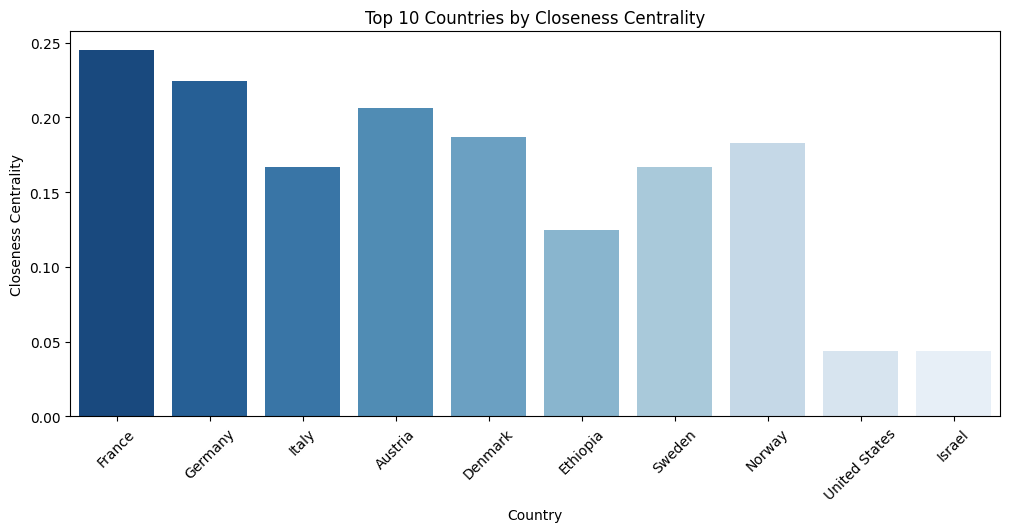

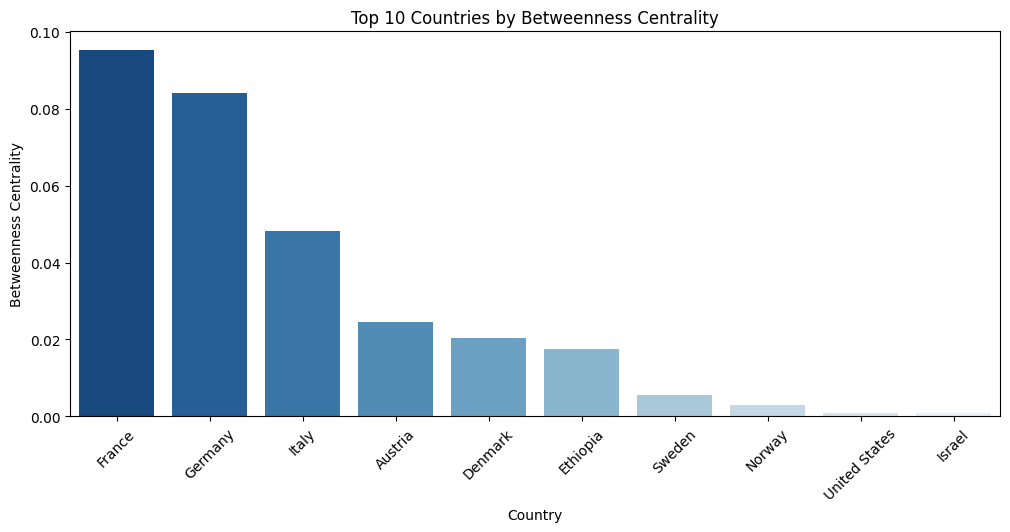

In [36]:
plt.figure(figsize=(12, 5))
sns.barplot(data=centrality_df.head(10), x="Country", y="Closeness Centrality", palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Closeness Centrality")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(data=centrality_df.head(10), x="Country", y="Betweenness Centrality", palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Betweenness Centrality")
plt.show()